In [1]:
include("../src/recfast.jl")
using .Recfast

In [2]:

using PyPlot

This notebook details the most common use cases for our implementation of RecFAST++ in Julia. The code is provided "as is" for anyone who may wish to use it. It is not as fast, stable, or accurate as the C version (the latter due to some omitted functionality). However, it is easy to further extend and modify, and can be readily integrated into an interactive envrionment. 

The basic ingredient is the params struct, which holds the all the cosmology. 

In [3]:
fieldnames(Params)

(:Yp, :T0, :Omega_M, :Omega_B, :Omega_K, :h100, :n_eff, :F, :rescaling, :fHe, :H0, :Omega_L, :artificial)

That is, helium fraction, photon temperature now, matter fraction, baryon fraction, curvature, $h$, effective neutrino number, "Recfast fudge factor" (accounts for higher level recombinations), rescaling (for changing the particle masses and coupling strength). The parameters fHe, H0, and Omega_L are used internally and calculated from the aforementioned. Artificial is used to manually alter reaction rates by an overall factor.

Let's try it out:

In [4]:
Params()

Params
  Yp: Float64 0.24
  T0: Float64 2.725
  Omega_M: Float64 0.26
  Omega_B: Float64 0.044
  Omega_K: Float64 0.0
  h100: Float64 0.6774
  n_eff: Float64 3.04
  F: Float64 1.14
  rescaling: Main.Recfast.Variables_Fund_Consts
  fHe: Float64 0.07951338564949938
  H0: Float64 2.1953019921620198e-18
  Omega_L: Float64 0.7399089660939351
  artificial: StaticArrays.SArray{Tuple{11},Float64,1,11}


Or, we can set whatever we need by hand

In [5]:
Params(Yp=0, T0 = 2.68)

Params
  Yp: Float64 0.0
  T0: Float64 2.68
  Omega_M: Float64 0.26
  Omega_B: Float64 0.044
  Omega_K: Float64 0.0
  h100: Float64 0.6774
  n_eff: Float64 3.04
  F: Float64 1.14
  rescaling: Main.Recfast.Variables_Fund_Consts
  fHe: Float64 0.0
  H0: Float64 2.1953019921620198e-18
  Omega_L: Float64 0.7399148320238095
  artificial: StaticArrays.SArray{Tuple{11},Float64,1,11}


Some common options:

In [6]:
#by default, from z = 10^4 to 10. Note that we do assume completely ionized hydrogen (and helium) at z0, 
#although the system will typically equilibrate rapidly if this assumption is not accurate 
p = Recfast.Params()
Evaluate_recombination(p)
Evaluate_recombination(p, logzstart = 4., logzend = -1);
sol = Evaluate_recombination(p, logzstart = 4., logzend = -1,dt = 1e-8, dtmin = 1e-30) #Max timestep in logz. First thing to try if issues arise

(::Main.Recfast.var"#mySol#31"{OrdinaryDiffEq.ODECompositeSolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},SciMLBase.ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,SciMLBase.NullParameters,SciMLBase.ODEFunction{false,Main.Recfast.var"#evalODE#29"{Params},LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},OrdinaryDiffEq.CompositeAlgorithm{Tuple{OrdinaryDiffEq.Rodas4P2{0,true,DiffEqBase.DefaultLinSolve,DataType},OrdinaryDiffEq.Rodas5{0,false,DiffEqBase.DefaultLinSolve,DataType}},Main.Recfast.var"#cf#30"{Params}},OrdinaryDiffEq.CompositeInterpolationData{SciMLBase.ODEFunction{false,Main.Recfast.var"#evalODE#29"{Params},LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Noth

Messy Julia text not withstanding, the solution object is actually quite easy to work with. It has a field t (z):

In [7]:
sol.t

3160-element Array{Float64,1}:
 10000.0
  9999.999769741495
  9999.999666882637
  9999.999469100867
  9999.999267985331
  9999.998981882938
  9999.998604389997
  9999.998026563015
  9999.997025974633
  9999.99482465599
  9999.98923294966
  9999.969031140643
  9999.873171963774
     ⋮
     0.5784995578410707
     0.5050192193068138
     0.43914382831252863
     0.3802604468514169
     0.3275445364214584
     0.28049213324416794
     0.23854772564005602
     0.20130689960738987
     0.1683644487712336
     0.13939028241731072
     0.11406526621815172
     0.1

And u, whose elements are $x_{He^+}$, $x_{H^+}$ (free proton fraction) and $T_m$ (the matter temperature)

In [8]:
sol.u

3160-element Array{Array{Float64,1},1}:
 [0.07951338564949938, 1.0, 27252.725000000002]
 [0.07951338564948739, 0.9999999999999944, 27252.724023812618]
 [0.07951338564948739, 0.9999999999999944, 27252.723686328165]
 [0.07951338564948739, 0.9999999999999944, 27252.72309894535]
 [0.07951338564948739, 0.9999999999999944, 27252.7225350718]
 [0.07951338564948739, 0.9999999999999944, 27252.721749519536]
 [0.07951338564948739, 0.9999999999999944, 27252.720719569683]
 [0.07951338564948739, 0.9999999999999944, 27252.719144823524]
 [0.07951338564948739, 0.9999999999999944, 27252.716418210584]
 [0.07951338564948739, 0.9999999999999944, 27252.71041961654]
 [0.07951338564948739, 0.9999999999999944, 27252.695182216386]
 [0.07951338564948739, 0.9999999999999944, 27252.640132285724]
 [0.07951338564948739, 0.9999999999999944, 27252.378916023674]
 ⋮
 [4.7968031179445356e-14, 0.00017802090820039467, 0.056085866933519475]
 [4.7956348107915515e-14, 0.00017772989460424776, 0.05098738850166099]
 [4.7945963553

There's a spline included, but beware that it can oscillate wildly where the system is stiff. 

In [9]:
sol(1e3)

3-element Array{Float64,1}:
    1.061760133829291e-12
    0.04926345826584542
 2727.630413253412

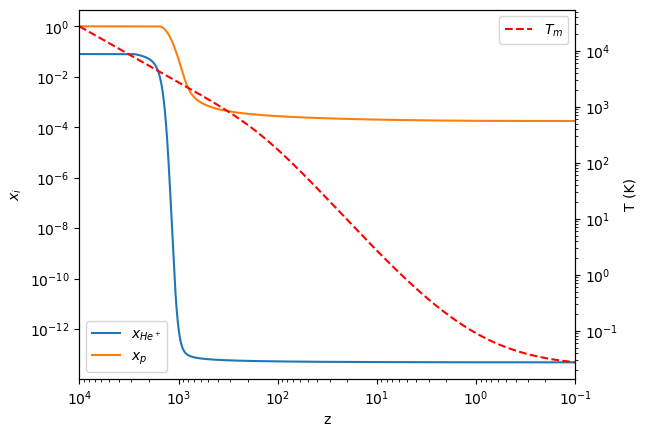

PyObject Text(623.793035413954, 0.5, 'T (K)')

In [10]:
loglog(sol.t, [s[1] for s in sol.u], label = L"x_{He^+}")
loglog(sol.t, [s[2] for s in sol.u], label = L"x_p")
xlim(1e4, .1)
xlabel("z")
ylabel(L"x_i")
legend(loc = "lower left")
twinx()
loglog(sol.t, [s[3] for s in sol.u], label = L"T_m", "r--")
legend()
ylabel("T (K)")

The standard RecFast variation of fundamental constants functionality can be used for unintended purposes to study atomic dark matter. However, in order to preserve the vanilla RecFast functionality this does have a few quirks. Specifically, we need to set 
\begin{equation}
N_{\rm eff} \rightarrow \frac{1}{\xi^4}
\left[N_{\rm eff} + \frac{8}{7}\left(\frac{T_{\rm cmb}}{T_\nu}\right)^{4}\right] = \frac{7.449}{\xi^4}
\end{equation}

to account for the contribution to the expansion from the Standard Model radiation, and 
\begin{equation}
\Omega_B = \Omega_{DM}/r_M,
\end{equation}
since the "baryons" are the dark matter. 

Let's make a new "parameters" struct for dark matter with $xi =0.01$, $r_M = 14$, $r_\alpha = 1.37$, and $r_m=0.1$. 

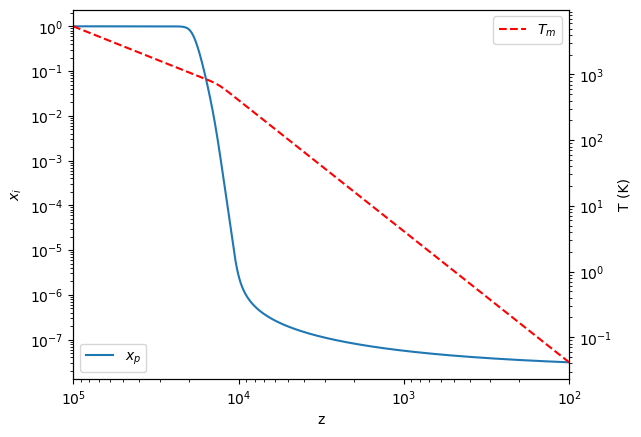

PyObject Text(617.6700587293836, 0.5, 'T (K)')

In [11]:
p = Params(Yp = 0.0, T0=2.7 * .02, n_eff= 7.449/.02^4, Omega_B = (.26-.044)/14)
Set_VFC_params!(p, mS= 0.1, mxS = 14, aS = 1.37)
#it is sometimes necessary to adjust the initial and minimum step size. 
sol = Evaluate_recombination(p, logzstart = 5, logzend = 2., dt = 1e-10, dtmin = 1e-100, dtmax = 0.01)
loglog(sol.t, [s[2] for s in sol.u], label = L"x_p")
xlim(1e5, 1e2)
xlabel("z")
ylabel(L"x_i")
legend(loc = "lower left")
twinx()
loglog(sol.t, [s[3] for s in sol.u], label = L"T_m", "r--")
legend()
ylabel("T (K)")

We have added in a minimal reaction network to accomodate the formation of molecules. Here's how to use it. 

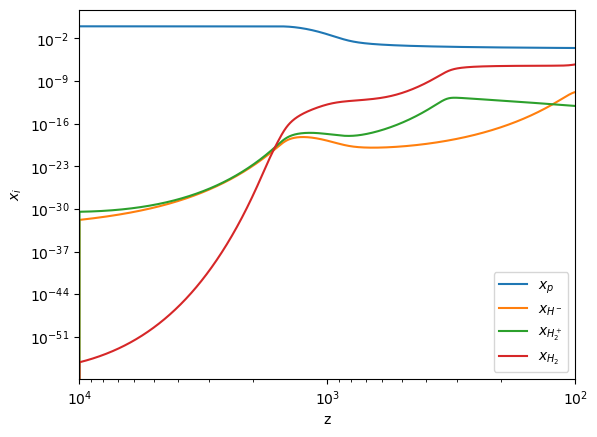

PyObject <matplotlib.legend.Legend object at 0x7f1fc486ded0>

In [12]:
p = Params()
sol = Evaluate_recombination_h2(p, logzstart = 4., logzend = 1., dt = 1e-10, dtmin = 1e-30, dtmax= 0.01)
loglog(sol.t, [s[2] for s in sol.u], label = L"x_p")
loglog(sol.t, [s[4] for s in sol.u], label = L"x_{H^-}")
loglog(sol.t, [s[5] for s in sol.u], label = L"x_{H_2^+}")
loglog(sol.t, [s[6] for s in sol.u], label = L"x_{H_2}")

xlim(1e4, 1e2)
xlabel("z")
ylabel(L"x_i")
legend()

We can multiply the rates by some arbitrary factor, indexed by an 11 element array as follows:

1. Recombination and photoionization
2. CH3
3. CH4
4. CH5
5. CH7
6. CH8
7. CH9
8. CH10
9. CH15
10. CH18
11. $H_2 + H \rightarrow 3H$

Let's turn off the $H^-$. 

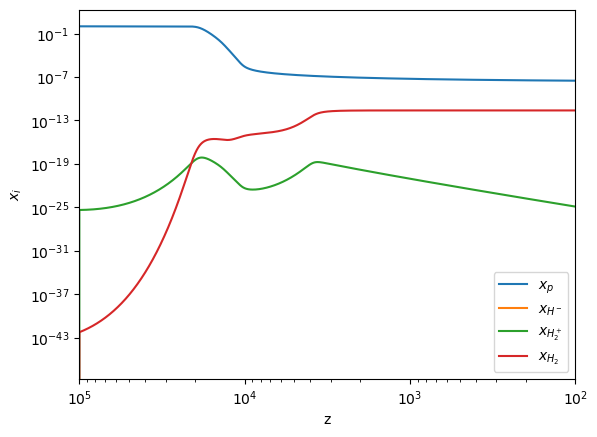

PyObject <matplotlib.legend.Legend object at 0x7f1fc43d35d0>

In [14]:
p = Params(Yp = 0.0, T0=2.7 * .02, n_eff= 7.449/.02^4, Omega_B = (.26-.044)/14)
Set_VFC_params!(p, mS= 0.1, mxS = 14, aS = 1.37)
artificials = ones(11)
artificials[2] =0.
Set_artificial_rates!(p, artificials)
sol = Evaluate_recombination_h2(p, logzstart = 5., logzend = 2., dt = 1e-10, dtmin = 1e-30, dtmax= 0.01)
loglog(sol.t, [s[2] for s in sol.u], label = L"x_p")
loglog(sol.t, [s[4] for s in sol.u], label = L"x_{H^-}")
loglog(sol.t, [s[5] for s in sol.u], label = L"x_{H_2^+}")
loglog(sol.t, [s[6] for s in sol.u], label = L"x_{H_2}")

xlim(1e5, 1e2)
xlabel("z")
ylabel(L"x_i")
legend()